In [163]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.plot as pl
import cupy as cp
import scipy.io
import math

In [3]:
sp.block.array_to_blocks

<function sigpy.block.array_to_blocks(input, blk_shape, blk_strides)>

In [14]:
toy_block = cp.random.rand(3,6,6)

In [85]:
p = sp.block.array_to_blocks(toy_block,blk_shape=list((3,4,4)),blk_strides=list((1,2,2)))

In [86]:
p.shape

(1, 2, 2, 3, 4, 4)

In [16]:
toy_block

array([[[0.98627528, 0.18624584, 0.88054261, 0.58178823, 0.64209424,
         0.8830192 ],
        [0.04113932, 0.11483225, 0.52881631, 0.33477247, 0.64942408,
         0.13486308],
        [0.64371306, 0.13899371, 0.94103423, 0.96757487, 0.57043887,
         0.0999125 ],
        [0.53623622, 0.47173017, 0.60808079, 0.33260532, 0.1225359 ,
         0.25473297],
        [0.69680404, 0.55501108, 0.10046829, 0.62551972, 0.9768773 ,
         0.13847775],
        [0.48000238, 0.54172142, 0.5063061 , 0.9948255 , 0.20397206,
         0.26992969]],

       [[0.66968704, 0.91216049, 0.47807347, 0.96117296, 0.86372393,
         0.73906421],
        [0.00913469, 0.11189667, 0.86800321, 0.6601489 , 0.59077391,
         0.98448392],
        [0.14699227, 0.53540424, 0.72781456, 0.40800898, 0.37059705,
         0.47033578],
        [0.26748419, 0.02627001, 0.92322491, 0.93121212, 0.54092055,
         0.87336137],
        [0.49769007, 0.02469515, 0.39394936, 0.41128956, 0.23712344,
         0.20877717

In [17]:
p.shape

(1, 2, 2, 3, 4, 4)

In [18]:
p1 = p.reshape(4,3,4,4)

In [142]:
def block2img(block,blk_shape=(3,2,2),blk_strides=(1,1,1),oshape = (3,4,4),gpu = False):
    # check 
    if gpu:
        xp = cp
    else:
        xp = np
    blk = ((xp.array(oshape)-xp.array(blk_shape))/xp.array(blk_strides)).astype(int)+1
#     print(blk)
    if xp.prod(blk) != block.shape[0]:
        raise ValueError('oops! input is wrong')
    if blk_strides[0] !=1:
        raise ValueError('Currently, we can only support 2D strides,sorry')
#         print("Currently, we can only")
    img_return = xp.zeros(oshape,dtype=xp.complex)
    for i in range(block.shape[0]):
        k1 = i // blk[-1]
        k2 = i % blk[-1]
#         print(blk.shape[-1])
#         print(k1,k2)
        img_return[:,k1*blk_strides[-1]:k1*blk_strides[-1]+blk_shape[-1],k2*blk_strides[-1]:k2*blk_strides[-1]+blk_shape[-1]] \
        = block[i,:,:,:]
    return img_return

In [28]:
toy_results = block2img(p1,blk_shape=(3,4,4),blk_strides=(1,2,2),oshape=(3,6,6))

[1 2 2]
3
0 0
3
0 1
3
1 0
3
1 1


In [111]:
cardiac_images = scipy.io.loadmat("images.mat")

In [401]:
imgs = cardiac_images["LplusS"]
imgs = imgs.transpose(2,0,1)
imgs = cp.array(imgs)

In [453]:
patches = sp.block.array_to_blocks(imgs,blk_shape=list((24,32,32)),blk_strides=list((1,16,16)))

In [454]:
pt = patches.reshape(225,24,32,32)

In [455]:
type(pt)

cupy.core.core.ndarray

In [456]:
imt = block2img(cp.array(pt),blk_shape=(24,32,32),blk_strides=(1,16,16),oshape = (24,256,256),gpu=True)

In [654]:
C_int = imt[0,:,:][None,:,:]/10

In [179]:
M_int1.shape

(225, 24, 1024, 1024)

In [175]:
gg = R_forward(C_int,patch_no=2,stride_length=16,patch_size=32)

In [176]:
C_int[0,:32,16:48]

array([[ 0.0228119 -0.00805406j,  0.01129455-0.00209454j,
        -0.01059874+0.00479188j, ...,  0.01766633+0.02033169j,
         0.02217228+0.01946747j,  0.01829287+0.01369586j],
       [-0.00430007+0.00645452j,  0.0032479 +0.00211272j,
        -0.00216883+0.0018594j , ...,  0.00262191+0.00197589j,
         0.00156631-0.00095831j, -0.00262538-0.00385317j],
       [-0.00289701+0.00293434j,  0.00030425+0.00413473j,
        -0.00122315-0.0009574j , ...,  0.00083832+0.00763499j,
         0.00087104-0.00042556j,  0.00524215-0.00242071j],
       ...,
       [ 0.00256203-0.00244572j, -0.00272361-0.00921505j,
        -0.01125998+0.00499121j, ..., -0.00476211-0.01047888j,
         0.00235253+0.0059911j ,  0.00615846+0.00238681j],
       [-0.00399805-0.0063757j ,  0.00103176-0.00393204j,
        -0.00419125-0.00796262j, ...,  0.00315693+0.00197606j,
        -0.00239351-0.00423783j,  0.00818473-0.00966114j],
       [ 0.00045929-0.00287538j, -0.01074269-0.01075602j,
        -0.00142052-0.00333879

In [156]:
M_int = np.matlib.repmat(np.eye(32*32),225*24,1)

In [158]:
M_int1 = M_int.reshape(225,24,1024,1024)

In [653]:
M_int_complex = np.array(M_int1,dtype=np.complex)

In [403]:
def M_forward(M,c,gpu = False):
    if gpu:
        xp = cp
    else:
        xp = np
    return xp.matmul(M,c)

def C_forward(C,m,gpu = False):
    if gpu:
        xp = cp
    else:
        xp = np
    return xp.matmul(m,C)

def M_adjoint(M,x,gpu = False):
    if gpu:
        xp = cp
    else:
        xp = np
    return xp.matmul(M.T.conj(),x)

def C_adjoint(C,x,gpu = False):
    if gpu:
        xp = cp
    else:
        xp = np
    return xp.matmul(x,C.T.conj())



def soft_thresh_complex(x, l,gpu = False):
    if gpu:
        xp = cp
    else:
        xp = np
    return xp.sign(abs(x)) * xp.maximum(xp.abs(x) - l, 0.)*xp.exp(1j*xp.angle(x))


In [279]:
def R_forward(im,patch_no,patch_size,stride_length):
    [frames,n,m]=im.shape
    n_patch_per_side=math.floor((n-patch_size)/stride_length)+1
    row_patch_no=math.floor((patch_no-1)/n_patch_per_side)
    column_patch_no=(patch_no-1)%n_patch_per_side
    crop=im[:,int(row_patch_no*stride_length):int(row_patch_no*stride_length+patch_size),int(column_patch_no*stride_length):int(column_patch_no*stride_length+patch_size)]
    crop=crop.reshape((frames*patch_size*patch_size,1))
    return crop

In [278]:
def R_adjoint(crop,patch_no,im_size,im_frames,stride_length):
    [a,b]=crop.shape
    patch_size=int((a/im_frames)**(1/2))
#     print(patch_size)
    crop=crop.reshape((im_frames,patch_size,patch_size))
    n_patch_per_side=math.floor((im_size-patch_size)/stride_length)+1
    row_patch_no=math.floor((patch_no-1)/n_patch_per_side)
    column_patch_no=(patch_no-1)%n_patch_per_side
    padded=cp.zeros((im_frames,im_size,im_size))
    padded[:,int(row_patch_no*stride_length):int(row_patch_no*stride_length+patch_size),int(column_patch_no*stride_length):int(column_patch_no*stride_length+patch_size)]=crop
    return padded

In [608]:
def neighboring_patches(patch_no,patch_size,im_size,stride_length):
    n_patch_per_side=math.floor((im_size-patch_size)/stride_length)+1
    row_patch_no=math.floor((patch_no-1)/n_patch_per_side)
    column_patch_no=(patch_no-1)%n_patch_per_side
    if ((row_patch_no+1)==n_patch_per_side) and ((column_patch_no+1)==n_patch_per_side):
        neighboring_patches=[patch_no-1,patch_no-n_patch_per_side,patch_no-n_patch_per_side-1]
    elif ((row_patch_no)==0) and ((column_patch_no+1)==n_patch_per_side):
        neighboring_patches=[patch_no-1,patch_no+n_patch_per_side,patch_no+n_patch_per_side-1]
    elif ((row_patch_no+1)==n_patch_per_side) and ((column_patch_no)==0):
        neighboring_patches=[patch_no+1,patch_no-n_patch_per_side,patch_no-n_patch_per_side+1]
    elif ((row_patch_no)==0) and ((column_patch_no)==0):
        neighboring_patches=[patch_no+1,patch_no+n_patch_per_side,patch_no+n_patch_per_side+1]
    elif (column_patch_no)==0:
        neighboring_patches=[patch_no+1,patch_no+n_patch_per_side,patch_no+n_patch_per_side+1,patch_no-n_patch_per_side,patch_no-n_patch_per_side+1]
    elif (row_patch_no)==0:
        neighboring_patches=[patch_no-1,patch_no+1,patch_no+n_patch_per_side,patch_no+n_patch_per_side+1,patch_no+n_patch_per_side-1]
    elif ((row_patch_no+1)==n_patch_per_side):
        neighboring_patches=[patch_no-1,patch_no+1,patch_no-n_patch_per_side,patch_no-n_patch_per_side+1,patch_no-n_patch_per_side-1]
    elif ((column_patch_no+1)==n_patch_per_side):
        neighboring_patches=[patch_no-1,patch_no+n_patch_per_side,patch_no+n_patch_per_side-1,patch_no-n_patch_per_side,patch_no-n_patch_per_side-1]
    else:
        neighboring_patches=[patch_no-1,patch_no+1,patch_no+n_patch_per_side,patch_no+n_patch_per_side-1,patch_no+n_patch_per_side+1,patch_no-n_patch_per_side,patch_no-n_patch_per_side-1,patch_no-n_patch_per_side+1]
    return neighboring_patches

def get_background(patch_num,M_int1,C_int,current_num):
    kp1 = cp.zeros((24,256,256),dtype=cp.complex)
    for jj in patch_num:
#         print(jj)
        M_k = cp.array(M_int1[jj-1,:,:,:].reshape(24*1024,1024))
        gg = R_forward(C_int,patch_no=jj,stride_length=16,patch_size=32)
        a0 = M_forward(M=M_k,c=gg,gpu=True)
        kp1+=R_adjoint(crop=a0,im_frames=24,im_size=256,patch_no=jj,stride_length=16)    
    re_crop = R_forward(kp1,patch_no=current_num,stride_length=16,patch_size=32).reshape(24,32,32)
    return re_crop


In [417]:
def powermethods(matrix_A,iterations = 10):
    max_eig=0
    for i in range(iterations):
        c = cp.random.rand(32*32,1)
        frwrd=M_forward(matrix_A,c,gpu = True)
        mag_c=cp.dot(cp.transpose(c),c)
        eig=cp.dot(cp.transpose(frwrd),frwrd)/mag_c
        eig = eig[0][0]
#         print(eig)
        max_eig=max(eig,max_eig)
#         print(max_eig)
        
    return float(abs(max_eig))
def powermethods_C(matrix_A,iterations=10):
    max_eig = 0
    for i in range(iterations):
        p = cp.random.rand(24576,1024)
        p1 = p.reshape(24576*1024,1)
        frwrd = C_forward(matrix_A,p,gpu=True)
        mag_c = cp.dot(cp.transpose(p1),p1)
        eig=cp.dot(cp.transpose(frwrd),frwrd)/mag_c
        print(eig)
        
        max_eig=max(eig,max_eig)
    return float(max_eig)

In [368]:
patch_c = R_forward(C_int,patch_no=0+1,stride_length=16,patch_size=32)


In [ ]:
C_forward(C=patch_c)

In [369]:
patch_c.shape

(1024, 1)

In [393]:
C_int.shape

(1, 256, 256)

In [400]:
type(imgs)

numpy.ndarray

In [414]:
M_int1

array([[[[1., 0., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 0., 1.]],

        [[1., 0., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 0., 1.]],

        [[1., 0., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
    

In [432]:
C_int

array([[[ 9.35204333e-05+4.07419646e-03j,
         -3.28684695e-03-9.01340899e-03j,
          2.73024506e-02+2.60853169e-02j, ...,
          4.25470690e-03+1.12653276e-02j,
          3.89651928e-04-6.58033315e-05j,
          9.26410097e-04+3.09975766e-03j],
        [ 1.92971863e-05-6.39931697e-04j,
          4.26245615e-04-3.55387668e-03j,
          2.48326757e-04+4.84157136e-03j, ...,
         -8.95198768e-03+4.12102546e-03j,
          1.13144985e-03-4.92348251e-03j,
         -2.44382839e-03-3.27026324e-03j],
        [-3.89616194e-03-1.43102951e-03j,
          5.59309219e-03+1.15197503e-03j,
          1.72130089e-03-2.39862713e-03j, ...,
          5.84838281e-03-4.51932412e-03j,
          4.37408718e-03+3.91841340e-03j,
         -5.37209742e-03-3.20425710e-03j],
        ...,
        [ 1.20050915e-03+3.38288267e-04j,
         -6.03502690e-03-1.13412433e-02j,
          3.81574674e-02+3.38621002e-02j, ...,
         -1.16510097e-02-1.76041119e-03j,
          1.68313206e-03-6.72753904e-03j

<IPython.core.display.Javascript object>


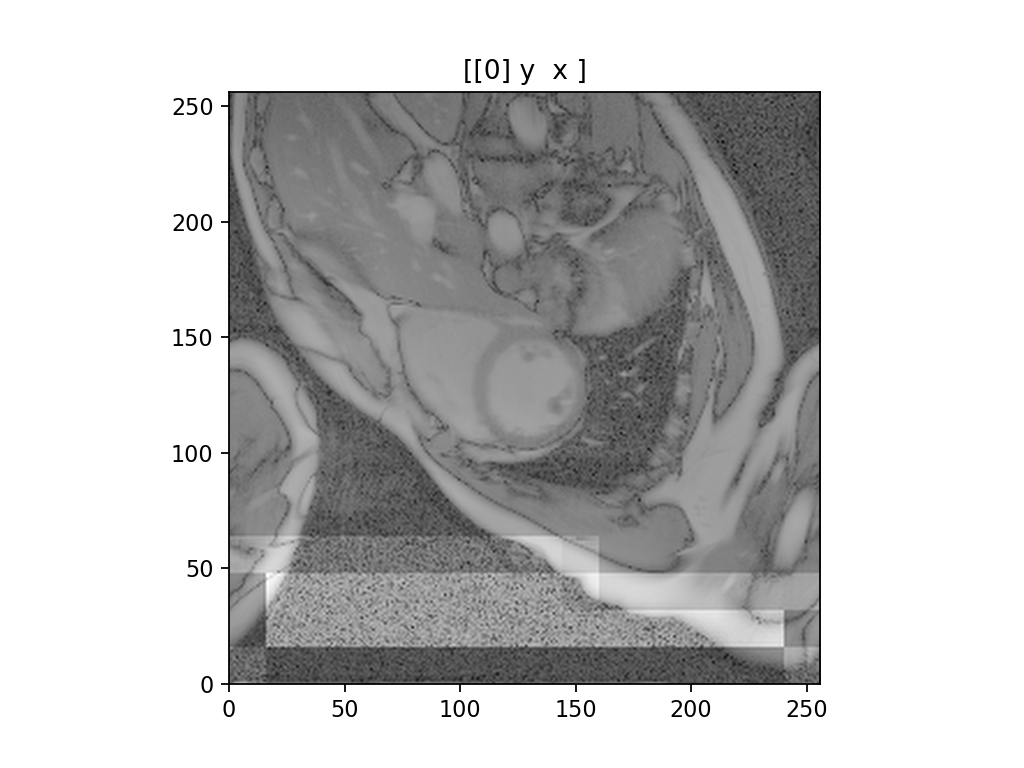

In [637]:
pl.ImagePlot(C_int)

In [494]:
im = M_forward(patch_m,patch_c,gpu = True)

<IPython.core.display.Javascript object>


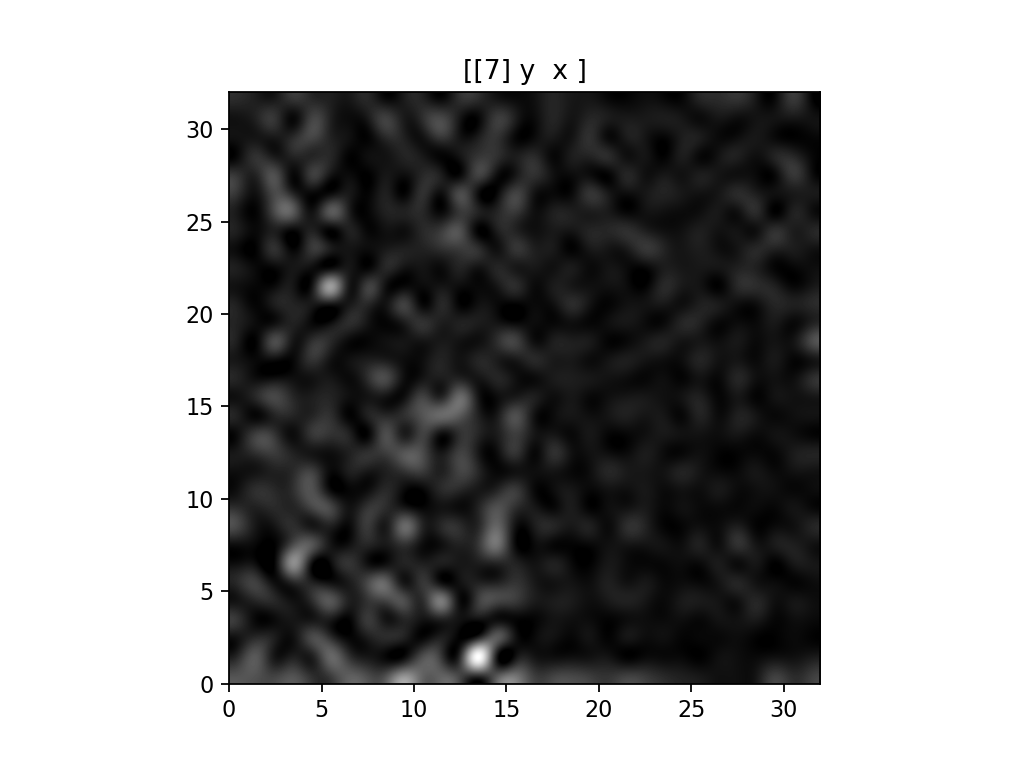

In [496]:
pl.ImagePlot(im.reshape(24,32,32))

In [655]:
def ista(C1,M1,L,lamda,x,gpu = False):
    if gpu:
        xp = cp
    else:
        xp = np
    C0=C1
    M0=M1
    converge = []
    print(xp.linalg.norm(M_forward(M0,C0,gpu = gpu)-x))
    
    for i in range(5):
        for j in range(10):
            C01 = C0 - (1/L)*M_adjoint(M0,M_forward(M0,C0,gpu = gpu)-x,gpu = gpu)
#             C01 = soft_thresh_complex(w,lamda/L,gpu = gpu)
            converge.append(xp.linalg.norm(M_forward(M0,C01,gpu = gpu)-x))
            C0 = C01
#             print(xp.linalg.norm(M_forward(M0,C0,gpu = gpu)-x),"ekin_1")
            
        for t in range(10):
            M01 = M0 - (1/10000)*C_adjoint(C0,C_forward(C0,M0,gpu = gpu)-x,gpu = gpu)
#             print(C_adjoint(C0,C_forward(C0,M0,gpu = gpu)-x,gpu = gpu))
            #M01 = soft_thresh_complex(M01,lamda/10000,gpu = gpu)
            converge.append(xp.linalg.norm(M_forward(M01,C0,gpu = gpu)-x))
            M0 = M01
        print(xp.linalg.norm(M_forward(M0,C0,gpu = gpu)-x),"ekin")
    return M0,C0,converge

In [ ]:
Mq,Cq,convergeq=ista(patch_c,patch_m,L,lamda,y,gpu = True)

<IPython.core.display.Javascript object>


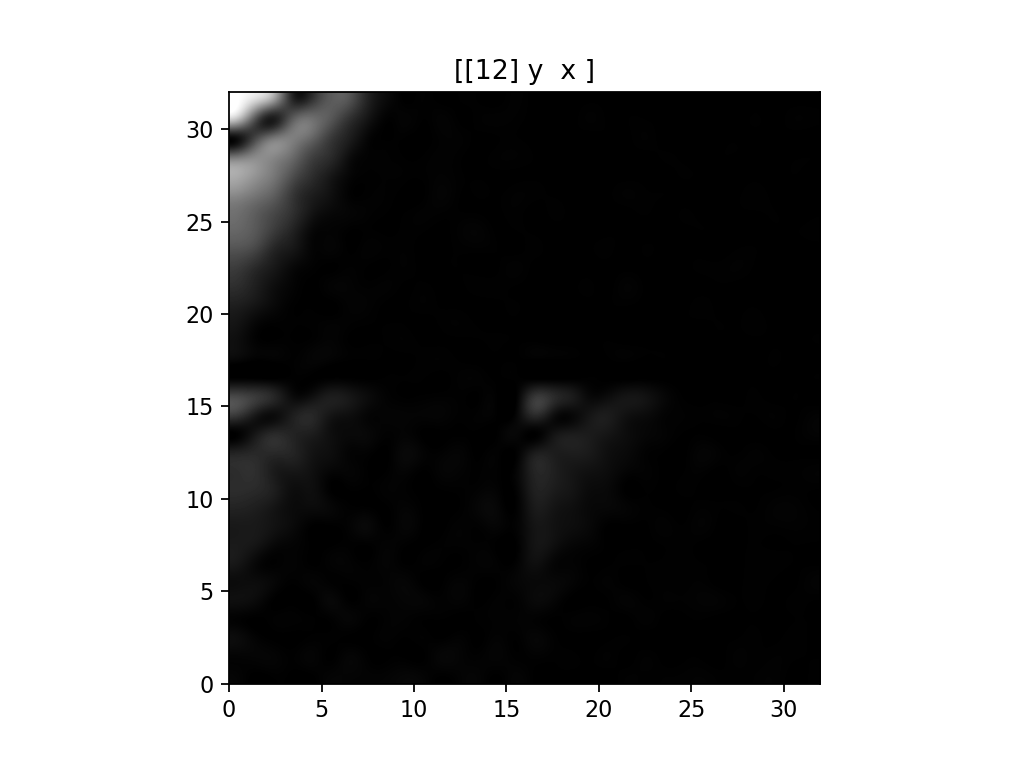

In [553]:
pl.ImagePlot(im_background.reshape(24,32,32))

<IPython.core.display.Javascript object>


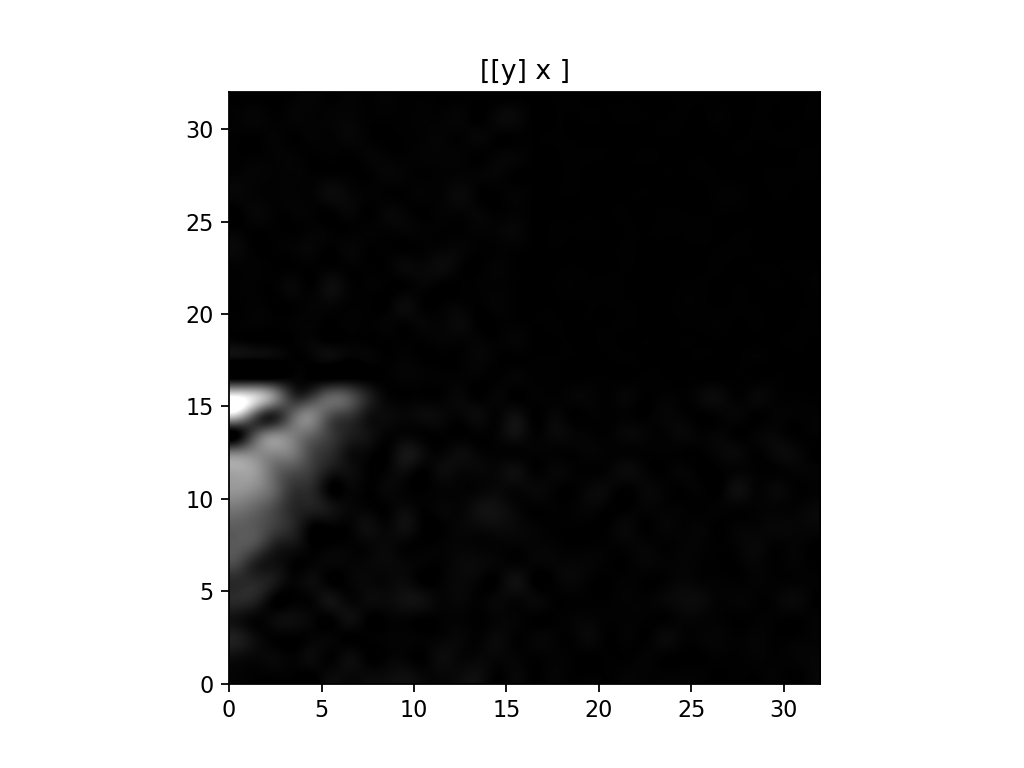

In [548]:
pl.ImagePlot(patch_c.reshape(32,32))

<IPython.core.display.Javascript object>


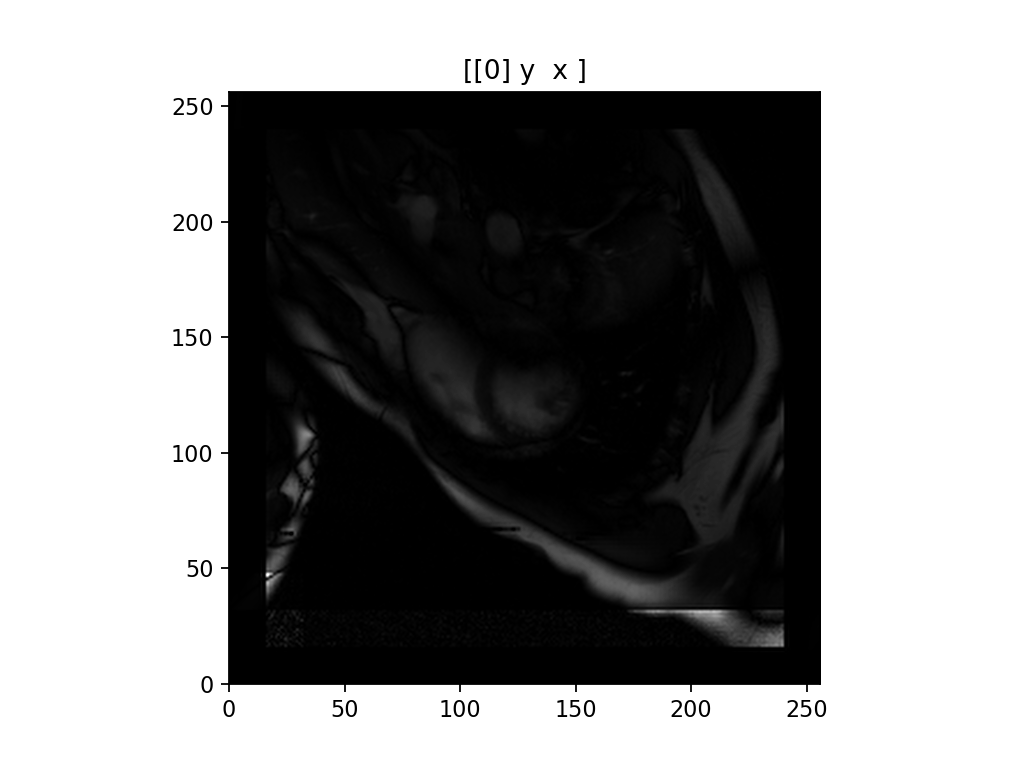

In [657]:
pl.ImagePlot(C_int)

In [594]:
M_int_complex.shape

(225, 24, 1024, 1024)

In [656]:
patchnum = 225
lamda = 0.1
N = 20
flag = 0
for j in range(N):
    for i in range(patchnum):
        print(i)
        patch_c = R_forward(C_int,patch_no=i+1,stride_length=16,patch_size=32)
        patch_m = cp.array(M_int_complex[i,:,:,:].reshape(24*1024,1024))
        nb = neighboring_patches(i+1,32,256,16)
        im_background = get_background(nb,M_int_complex,C_int,current_num=i+1).reshape(24*32*32,1)
        y_patch = R_forward(imgs,patch_no=i+1,stride_length=16,patch_size=32)
        y = y_patch - im_background
        L=powermethods(patch_m,iterations = 10)
        M0,C0,converge=ista(patch_c,patch_m,L,lamda,y,gpu = True)
        if math.isnan(converge[-1]):
            flag = 1
            break
        crop=R_forward(C_int,patch_no=i+1,stride_length=16,patch_size=32)
    #     print(crop.shape)
        full=R_adjoint(crop,i+1,256,1,16)
        subtracted=C_int-full
        C_int=subtracted+R_adjoint(C0,i+1,256,1,16)
        M_int_complex[i,:,:,:] = cp.asnumpy(M0.reshape(24,1024,1024))   
    if flag == 1:
        break

0
11.389660573295371
0.7875019393495615 ekin
0.7821899293523051 ekin
0.7769134826776432 ekin
0.7716723666259799 ekin
0.766466349911628 ekin
1
1.3232159291502257
0.9064205816538695 ekin
0.9063924918351995 ekin
0.9063644009639859 ekin
0.9063363090403678 ekin
0.9063082160644845 ekin
2
1.3250423439651489
0.9329714005331193 ekin
0.9329438724946072 ekin
0.932916343271713 ekin
0.9328888128645624 ekin
0.9328612812732815 ekin
3
1.3971179452599325
0.9272649756819431 ekin
0.9272268592715354 ekin
0.9271887416971788 ekin
0.9271506229591745 ekin
0.9271125030578238 ekin
4
1.5845661719514188
0.9270545276347864 ekin
0.9269999311315485 ekin
0.9269453339341885 ekin
0.9268907360433883 ekin
0.9268361374598296 ekin
5
1.5274189486561789
0.9185837692680926 ekin
0.91852759359506 ekin
0.9184714174081151 ekin
0.9184152407079779 ekin
0.9183590634953682 ekin
6
1.3690082837838453
0.9131842229201402 ekin
0.9131513243936019 ekin
0.9131184247663233 ekin
0.9130855240385148 ekin
0.9130526222103866 ekin
7
1.3227026711235

0.3926304988224593 ekin
0.23843262363605042 ekin
0.1447927050152863 ekin
0.08792805145624925 ekin
58
121.38229025978549
0.7646438080927456 ekin
0.5446828664741794 ekin
0.3879940280320471 ekin
0.2763788071825351 ekin
0.1968718436626395 ekin
59
85.65355000375749
0.9680721332053404 ekin
0.804237880761827 ekin
0.668123991601393 ekin
0.5550430459034502 ekin
0.46109905609500024 ekin
60
102.59254480074955
3.055603508395728 ekin
2.2250082867134733 ekin
1.61999962934814 ekin
1.179426765695993 ekin
0.8586429680514006 ekin
61
296.2194830299913
0.25641619444057145 ekin
0.027440940619065733 ekin
0.0029367886573044974 ekin
0.000314301624065659 ekin
3.363725586215142e-05 ekin
62
116.81217560803265
1.5369507682307617 ekin
1.1265823741754126 ekin
0.8257583572474214 ekin
0.6052517237846453 ekin
0.4436243220965669 ekin
63
11.739071862552544
1.6730340679434763 ekin
1.667753619471325 ekin
1.6624886186326695 ekin
1.6572390317448196 ekin
1.6520048250864967 ekin
64
14.426612409134512
1.6000221187389303 ekin
1

0.001912191787209059 ekin
0.00011437704890449828 ekin
6.841421197135796e-06 ekin
114
99.39114362202533
3.212051988514514 ekin
2.5639362562651846 ekin
2.0463507234247134 ekin
1.633126785526756 ekin
1.3032829226793556 ekin
115
23.77103695014864
2.2995870365029942 ekin
2.2696561199509047 ekin
2.2401021629760076 ekin
2.210920904721852 ekin
2.1821081134719305 ekin
116
49.08017037404953
2.0266985283898844 ekin
1.9045169786274865 ekin
1.789667531448642 ekin
1.6817159329178328 ekin
1.5802526678967799 ekin
117
149.51402225937036
0.7442943804458844 ekin
0.4309412485641841 ekin
0.24951091101502812 ekin
0.1444642537015739 ekin
0.08364327847674242 ekin
118
269.47170563481114
0.14098908001224925 ekin
0.022299801239736506 ekin
0.00352711274346109 ekin
0.0005578761085146114 ekin
8.823810758520275e-05 ekin
119
303.42385783520484
0.08643298992308159 ekin
0.008452104824052679 ekin
0.0008265191673723583 ekin
8.082412477385326e-05 ekin
7.903675325541162e-06 ekin
120
53.237101471326845
1.0932953999671189 ek

1.4833453287499727 ekin
1.3624631354534051 ekin
1.2514155006424255 ekin
1.1494060314007113 ekin
171
70.40290242233303
6.2712659715305366 ekin
5.574440335061715 ekin
4.953531695636006 ekin
4.40072128975564 ekin
3.9088586036900654 ekin
172
112.4603745393659
4.951363446373765 ekin
3.7116328739767095 ekin
2.7814538663422526 ekin
2.084029279060098 ekin
1.5613264844316375 ekin
173
54.413385100416775
1.197226477922461 ekin
1.1164766597481965 ekin
1.0411656345816196 ekin
0.9709285115801616 ekin
0.9054246097511751 ekin
174
82.36783537482614
1.0115547138159984 ekin
0.8622633446262531 ekin
0.7349980984920078 ekin
0.6265120305650032 ekin
0.5340357952616236 ekin
175
115.32258680287339
0.6210716209779451 ekin
0.45542511651854783 ekin
0.3339566942734716 ekin
0.24488500349831677 ekin
0.17956993055290416 ekin
176
118.38713566620505
0.5975740238489247 ekin
0.43274374935776916 ekin
0.31337758697430784 ekin
0.22693633180779665 ekin
0.1643386023085892 ekin
177
92.36839200865484
0.770484296739524 ekin
0.600

0.6114922948686581 ekin
3
49.86252921753668
0.816570453724139 ekin
0.7702741019881919 ekin
0.7266004694590618 ekin
0.6854013151675895 ekin
0.6465367227094223 ekin
4
53.082630432119856
0.8115434637132865 ekin
0.7595810327170447 ekin
0.7109434434029483 ekin
0.6654183625697174 ekin
0.6228069436064065 ekin
5
53.20927688432386
0.80094395959806 ekin
0.7494120337902123 ekin
0.7011934316436779 ekin
0.6560755138191413 ekin
0.6138592159160252 ekin
6
53.36027201079201
0.7954599274429272 ekin
0.7440341633073773 ekin
0.6959308766718058 ekin
0.6509358023238034 ekin
0.6088484218705328 ekin
7
49.37814049597225
0.9309395252156412 ekin
0.8791594186728259 ekin
0.8302563219652573 ekin
0.7840708667339505 ekin
0.7404524361863792 ekin
8
51.874150748399884
1.5574007443313975 ekin
1.4621024739193662 ekin
1.3726200766075811 ekin
1.2886012938793683 ekin
1.209714740875249 ekin
9
54.96631577321628
1.5419026805015488 ekin
1.436030656419867 ekin
1.337411755209415 ekin
1.2455522284688576 ekin
1.1599913326379456 ekin


In [606]:
C_int.shape

(1, 256, 256)

In [658]:
result=cp.zeros((24,256,256),dtype=cp.complex)
for i in range(patchnum):
    M_current=cp.array(M_int_complex[i,:,:,:].reshape(24*1024,1024))
    patch=R_forward(C_int,patch_no=i+1,stride_length=16,patch_size=32)
    res = M_forward(M=M_current,c=patch,gpu=True)
    result+=R_adjoint(crop=res,im_frames=24,im_size=256,patch_no=i+1,stride_length=16) 
    

In [651]:
y.shape

(24576, 1)

<IPython.core.display.Javascript object>


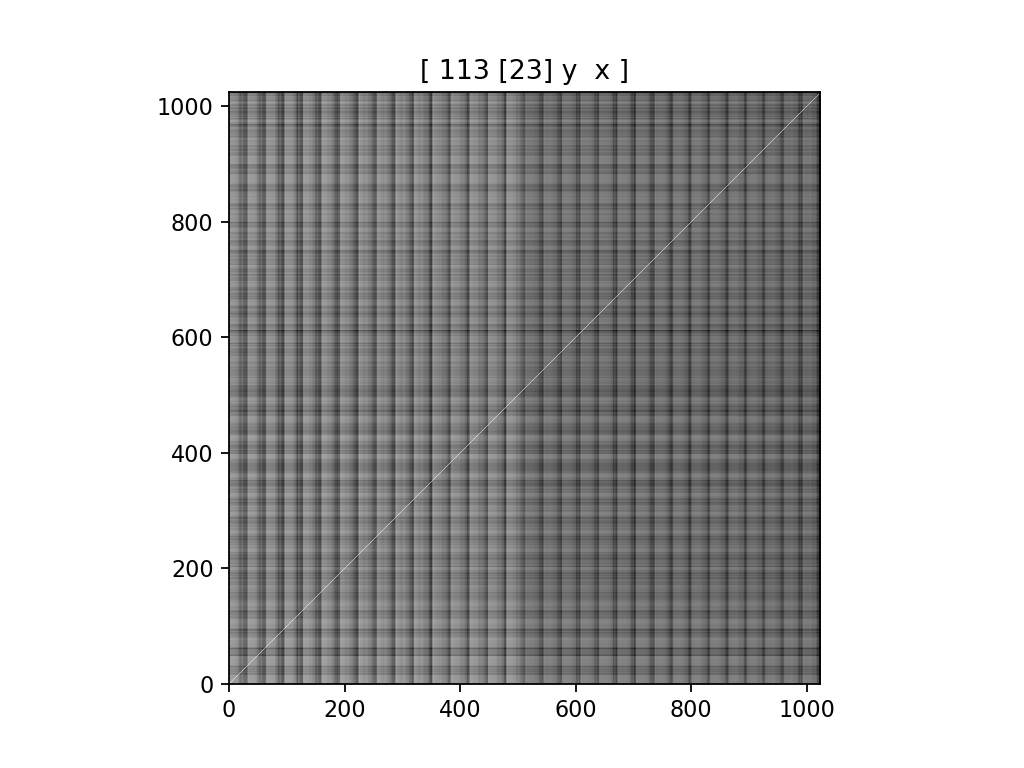

In [660]:
pl.ImagePlot(M_int_complex[:1024,:1024])

<IPython.core.display.Javascript object>


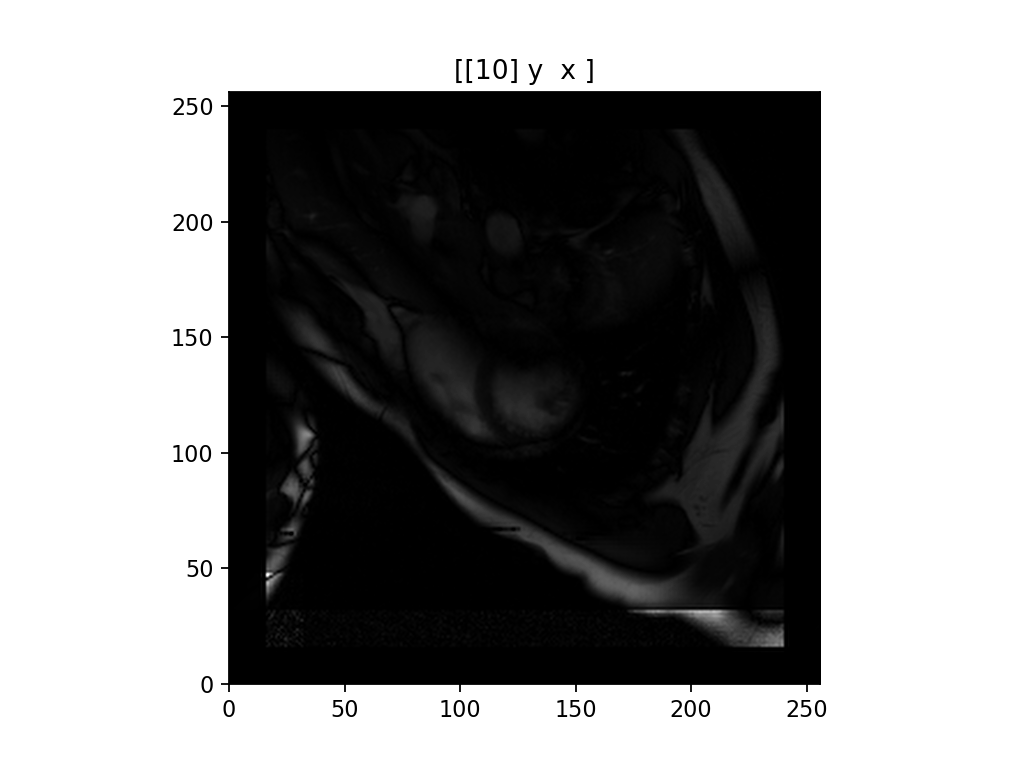

In [659]:
pl.ImagePlot(result)

<IPython.core.display.Javascript object>


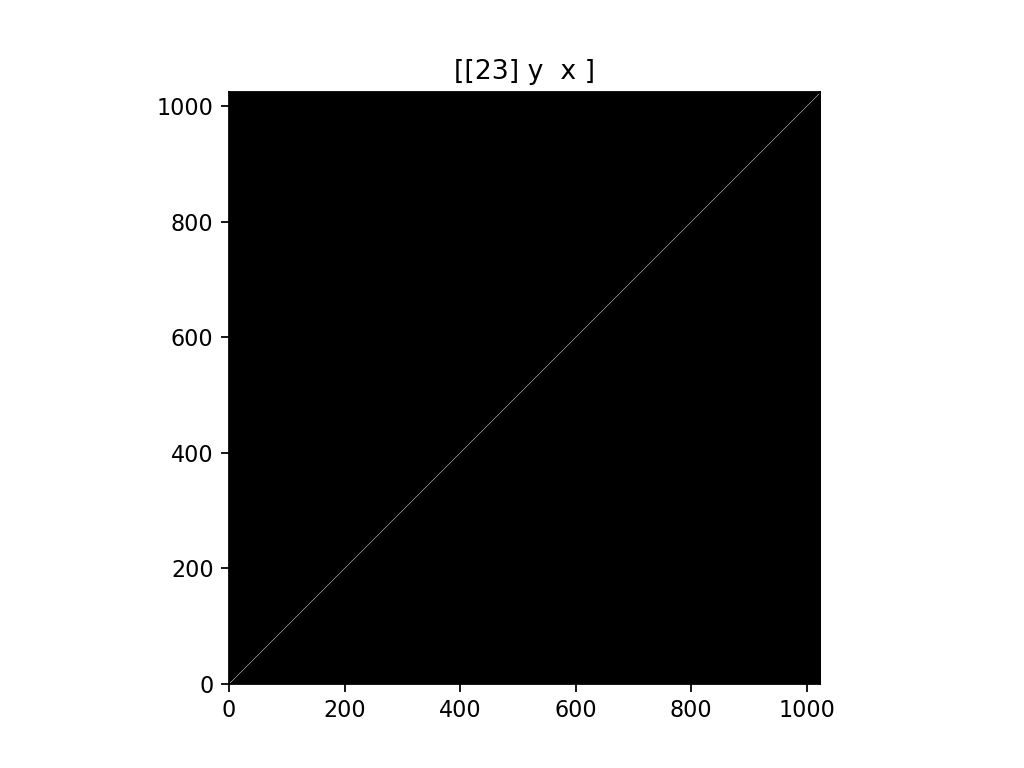

In [478]:
pl.ImagePlot(patch_m.reshape(24,1024,1024))

In [410]:
crop=R_forward(C_int,patch_no=i+1,stride_length=16,patch_size=32)

In [397]:
M_int1.shape

(225, 24, 1024, 1024)

In [329]:
patch_m = cp.array(M_int1[0,:,:,:].reshape(24*1024,1024))

In [330]:
patch_m.shape

(24576, 1024)

In [317]:
nb = neighboring_patches(1,32,256,16)

In [320]:
ak = get_background(nb,M_int1,C_int)

2
16
17


In [394]:
bl = R_forward(imgs,patch_no=1,stride_length=16,patch_size=32)

In [396]:
bl.shape

(24576, 1)

In [328]:
bl.shape

(24576, 1)

In [321]:
ak.shape

(24, 32, 32)

In [318]:
nb

[2, 16, 17]

In [313]:
aa = R_forward(C_int,patch_no=1,stride_length=16,patch_size=32)

In [315]:
bb = cp.array(M_int1[i,:,:,:].reshape(24*1024,1024))

In [316]:
bb.shape

(24576, 1024)

In [76]:
C=cp.ones((n*n,1))
# C[0:3,0:3]=np.ones(3)
M=np.matlib.repmat(np.eye(n*n,n*n),tdim, 1)
M = cp.array(M)
x_toy = cp.array(x_toy)
# M=np.ones((n*tdim,n))

In [80]:
M,C,converge=ista(C,M,300,0.1,x_toy,gpu=True)

4.696583555822481e-13
3.5228204135325973e-13
4.223609967334032e-13
2.578192881705201e-13
1.9687520429017191e-13
1.1787631677614788e-13
2.1706668316984915e-13
5.786962067673111e-14
1.1065094875947991e-13
1.3661327614066826e-13


<IPython.core.display.Javascript object>


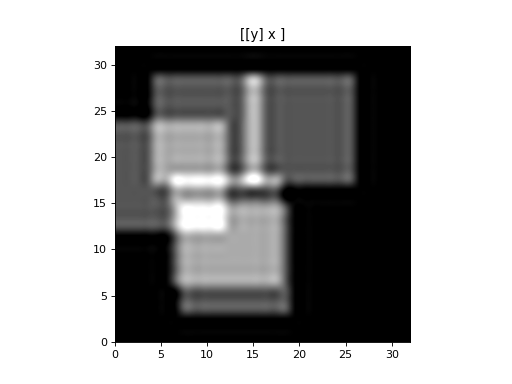

In [78]:
#pl.ImagePlot(M.dot(C).reshape((tdim,n,n)).transpose(2,1,0))
#pl.ImagePlot(x_toy.reshape((tdim,n,n)))
pl.ImagePlot(C.reshape(n,n))


<IPython.core.display.Javascript object>


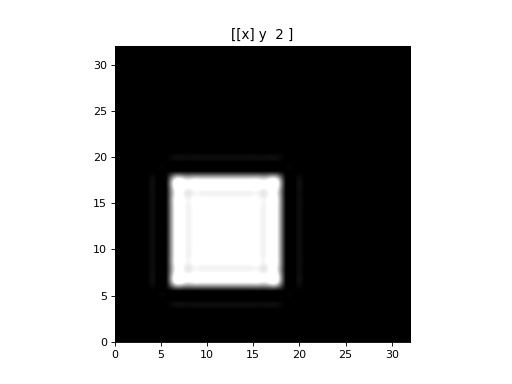

In [79]:
pl.ImagePlot(M.dot(C).reshape((tdim,n,n)).transpose(2,1,0))

<IPython.core.display.Javascript object>


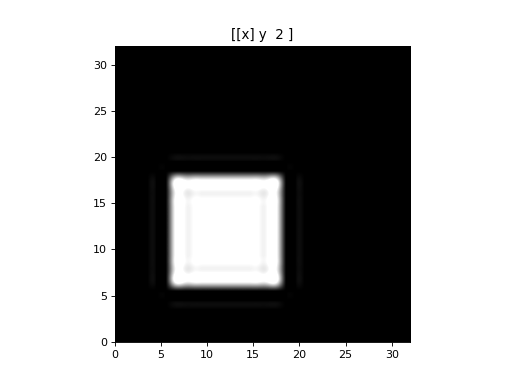

In [72]:
pl.ImagePlot(x_toy.reshape((tdim,n,n)).transpose(2,1,0))

In [42]:
def calc_vector(weights,index1,index2):
    [n,m]=weights.shape
    vector=np.zeros((2,1))
    for i in range(n):
        for j in range(n):
            vector[0]+=(index1-i)*abs(weights[i,j])
            vector[1]+=(index2-j)*abs(weights[i,j])
      
    return vector
            

In [43]:
vector_maps=np.zeros((n*n*tdim,2))
M_new=M.reshape((tdim,n*n,n,n))
b=0
for i in range(tdim):
    print(i)
    for j in range(n*n):
        a=j%n
        vect=calc_vector(M_new[i,j,:,:],a,b).T
        if np.linalg.norm(vect)>=50:
            vector_maps[i*n*n+j,:]=vect
        if a==31 & b==31:
            b=0
        elif a==31:
            b+=1
        
    

0
1
2
3
4


In [45]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


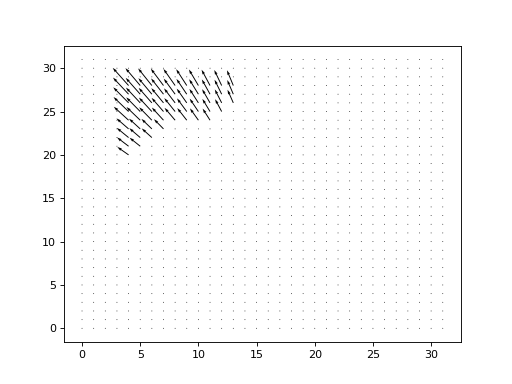

In [46]:
maps=vector_maps.reshape((tdim,n,n,2))
test=maps[0,:,:,:]
plt.figure()
Q = plt.quiver(test[:,:,0],test[:,:,1],scale=300, scale_units='inches')

<IPython.core.display.Javascript object>


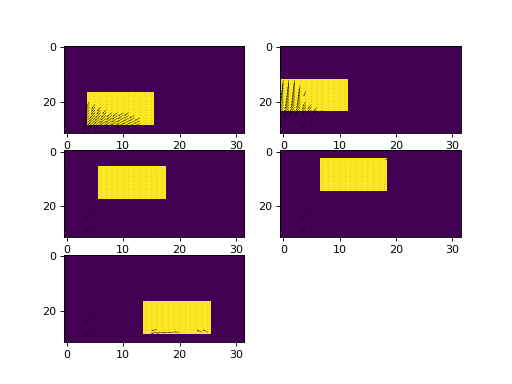

In [47]:
img_full=abs(M.dot(C).reshape((tdim,n,n)).transpose(2,1,0))
fig=plt.figure()
columns = 2
rows = 3
maps=vector_maps.reshape((tdim,n,n,2))
for i in range(1,tdim+1):
    img = img_full[:,:,i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.T,aspect='auto')
    test=maps[i-1,:,:,:]
    plt.quiver(-test[:,:,1],test[:,:,0],scale=700, scale_units='inches')
plt.show()

In [144]:
import scipy.io 

In [145]:
image_data=scipy.io.loadmat('Documents/images.mat')

In [146]:
LPS_image = image_data['LplusS']

<IPython.core.display.Javascript object>


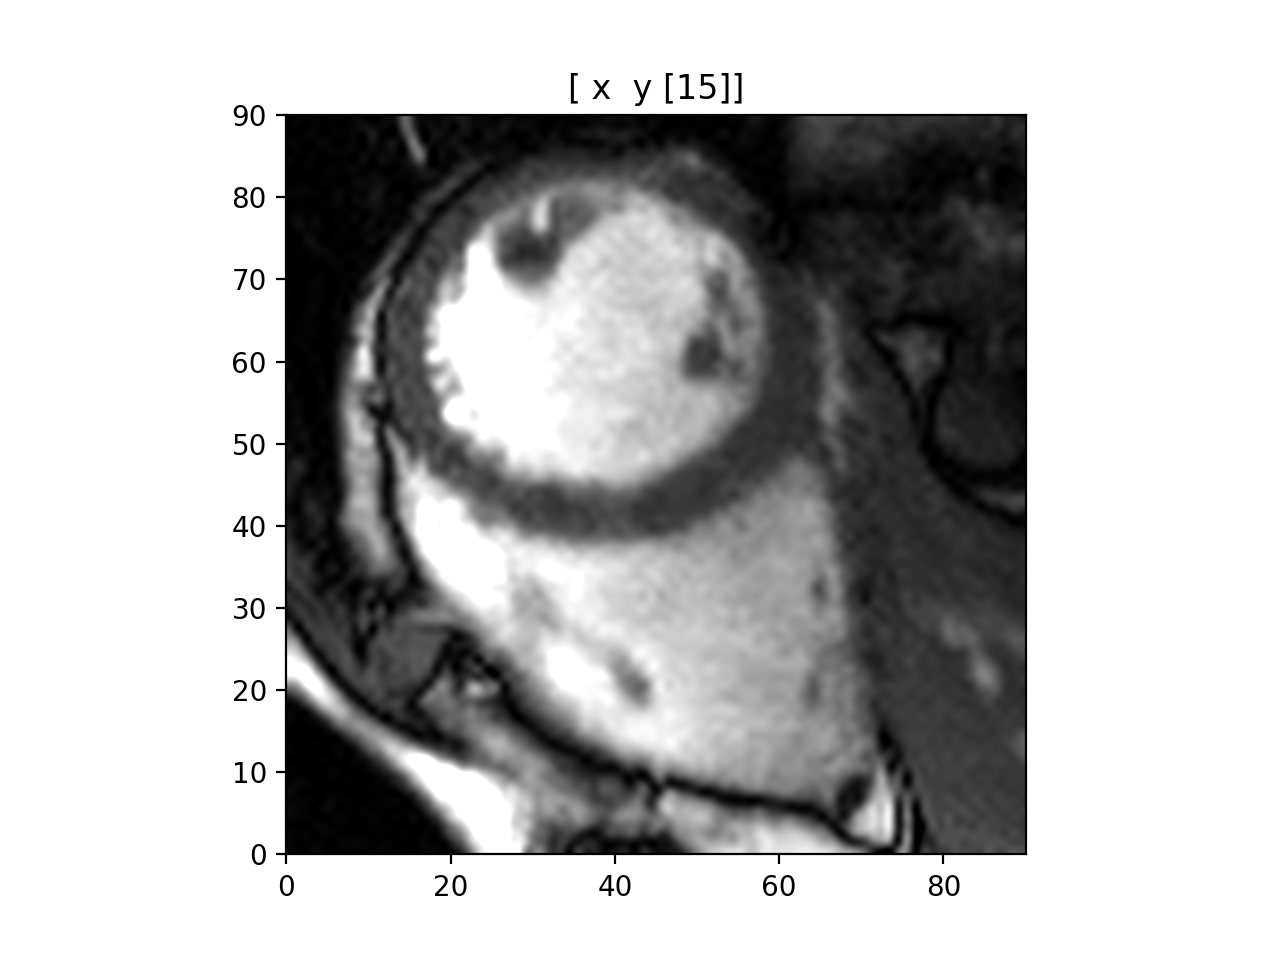

/Users/ekin_karasan/anaconda3/lib/python3.6/site-packages/sigpy/plot.py:335: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  imv = to_device(self.im[idx])


In [147]:
pl.ImagePlot(LPS_image[90:180,68:158,:])

In [148]:
x=LPS_image[90:180,68:158,:]

In [150]:
n=90
tdim=24
C=x[:,:,0].reshape((n*n,1))
# C[0:3,0:3]=np.ones(3)
M=np.matlib.repmat(np.eye(n*n,n*n),tdim, 1)
# M=np.ones((n*tdim,n))

In [152]:
M,C,converge=ista(C,M,300,0.1,x)

ValueError: shapes (194400,8100) and (90,90) not aligned: 8100 (dim 1) != 90 (dim 0)